In [53]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import numpy as np

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [54]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

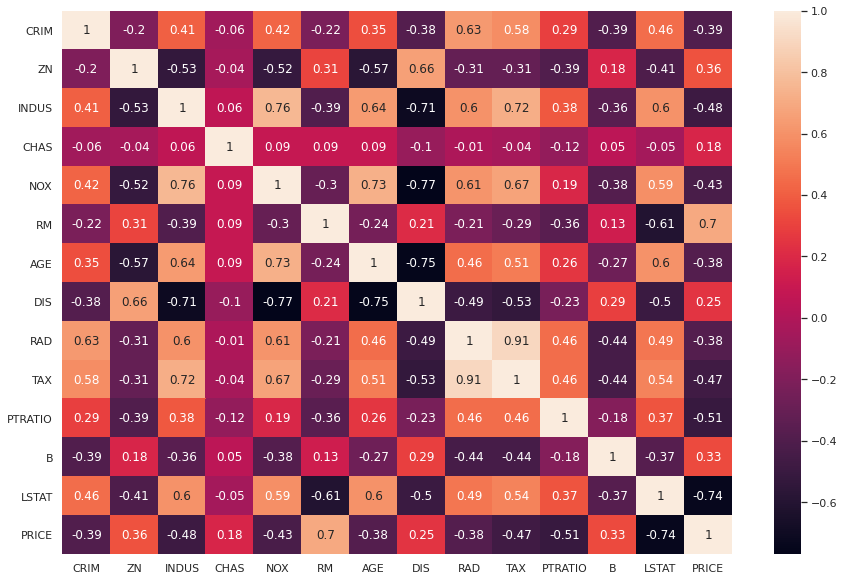

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,ax=ax)

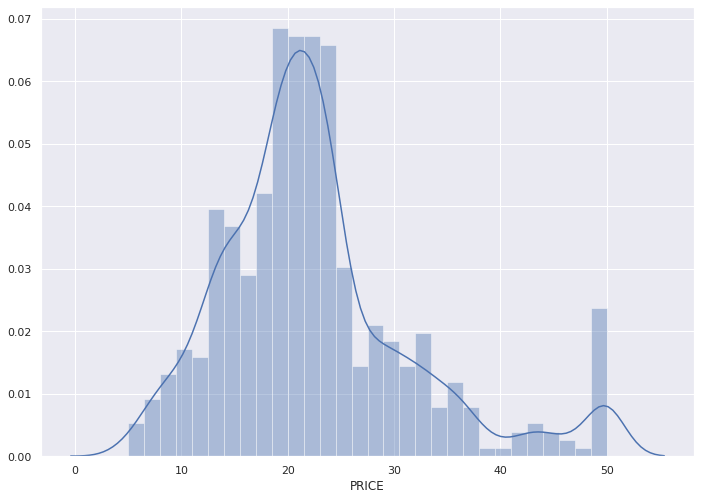

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['PRICE'], bins=30)
plt.show()

In [57]:
# eda: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
# Featue selection: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

# Filter method for feture extraction : pearson correlation
#Correlation with output variable
cor_target = abs(correlation_matrix["PRICE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.70
PTRATIO    0.51
LSTAT      0.74
PRICE      1.00
Name: PRICE, dtype: float64

In [58]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


In [59]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
# split dataset depended and independ variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [61]:
# Backward elimination feture extracting process
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/var/www/html/www/python/ai/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

In [62]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    #print(p)
    pmax = max(p)
    #print("pmax==",pmax)
    feature_with_p_max = p.idxmax()
    #print("feature_with_p_max========",feature_with_p_max)
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


/var/www/html/www/python/ai/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/var/www/html/www/python/ai/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/var/www/html/www/python/ai/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [63]:
model = LinearRegression()
rfe = RFE(model,7)
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# if i==0:
#         print("X_train ",X_train.shape)
#         print("X_test ",X_test.shape)
#         print("y_train ",y_train.shape)
#         print("y_test ",y_test.shape)

In [66]:
nof_list = np.arange(1,13)
high_score = 0
nof = 0
score_list = []
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score > high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


In [67]:
model = LinearRegression()
rfe = RFE(model,10)
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[ True  True  True  True  True  True False  True  True False  True False
  True]
[1 1 1 1 1 1 4 1 1 2 1 3 1]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


In [68]:
sprt = rfe.support_
clm = X.columns
res = dict(zip(clm,sprt))
final_clm = [key for key,value in res.items() if value]
final_clm

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']

In [69]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
coef

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


/var/www/html/www/python/ai/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CRIM      -0.074266
ZN         0.049454
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
RM         1.804385
AGE        0.011333
DIS       -0.813244
RAD        0.272284
TAX       -0.015425
PTRATIO   -0.742872
B          0.008926
LSTAT     -0.703654
dtype: float64

In [70]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


In [71]:
imp_coef = coef.sort_values()
imp_coef

DIS       -0.813244
PTRATIO   -0.742872
LSTAT     -0.703654
CRIM      -0.074266
TAX       -0.015425
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
B          0.008926
AGE        0.011333
ZN         0.049454
RAD        0.272284
RM         1.804385
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

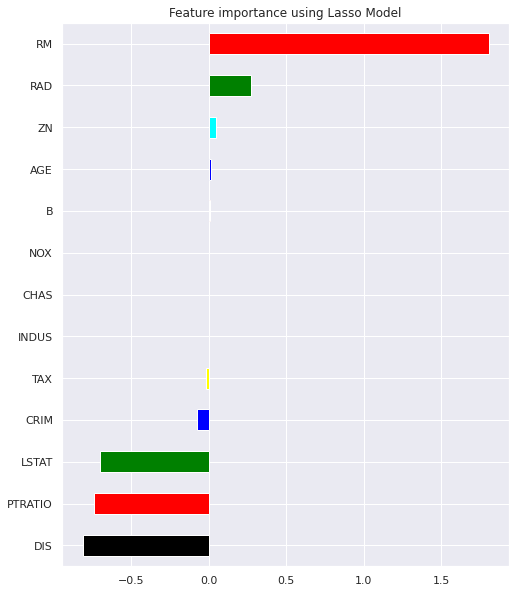

In [72]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh",color=['black', 'red', 'green', 'blue', 'yellow','red','black', 'red', 
                                   'red', 'blue', 'cyan','green','red'])
plt.title("Feature importance using Lasso Model")

In [73]:
dropabble_fe = {'AGE','CHAS','NOX','INDUS'}
final_X = X.drop(dropabble_fe,axis=1)
X_train, X_test, y_train, y_test = train_test_split(final_X,y, test_size = 0.3, random_state = 0)
reg = LinearRegression()
reg.fit(X_train,y_train)

print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


# train score
train_score = reg.score(X_train, y_train)
print(train_score)

# test score
test_score = reg.score(X_test, y_test)
print(test_score)

x_train shape: (354, 9)
x_test shape: (152, 9)
y_train shape: (354,)
y_test shape: (152,)
0.7484684972928728
0.6541178598389141


In [74]:
print(reg.intercept_)
print(reg.coef_)

25.480375203417502
[-0.11592092  0.0517556   3.93993425 -1.08653586  0.23164344 -0.01512653
 -0.86563582  0.0082085  -0.54508945]


In [75]:
# model evaluation for training set
y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.6174609310025065
R2 score is 0.7484684972928728


The model performance for testing set
--------------------------------------
RMSE is 5.366567796130782
R2 score is 0.6541178598389141


In [77]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='PRICE ~ CRIM+ZN+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     144.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          1.85e-132
Time:                        09:21:25   Log-Likelihood:                -1514.7
No. Observations:                 506   AIC:                             3049.
Df Residuals:                     496   BIC:                             3092.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4831      4.341      5.410      0.000      14.954      32.012
CRIM          -0.1020      0.034     -3.036      0.003      -0.168      -0.036
ZN             0.0524      0.014      3.784      0.000       0.025       0.080
RM             3.9721      0.417      9.520      0.000       3.152       4.792
DIS           -1.1043      0.167     -6.620      0.000      -1.432      -0.777
RAD            0.2974      0.065      4.578      0.000       0.170       0.425
TAX           -0.0163      0.003     -4.852      0.000      -0.023      -0.010
PTRATIO       -0.7934      0.126     -6.293      0.000      -1.041      -0.546
B              0.0106      0.003      3.857      0.000       0.005       0.016
LSTAT         -0.5734      0.048    -12.002      0.000      -0.667      -0.480
==============================================================================
Omnibus:                      194.490   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              941.260
Skew:                           1.643   Prob(JB):                    4.06e-205
Kurtosis:                       8.818   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

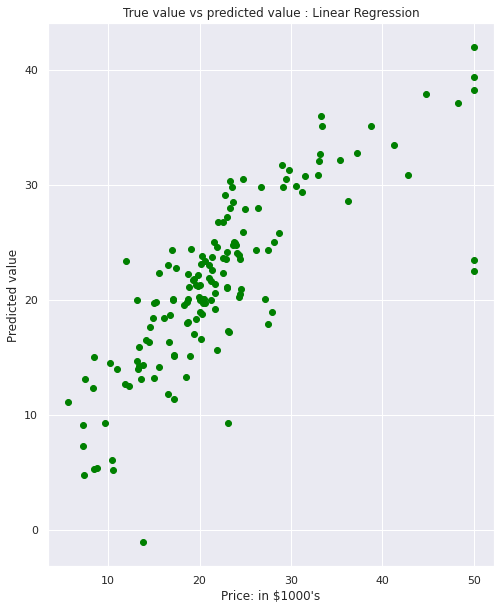

In [81]:
plt.scatter(y_test, y_test_predict, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [89]:
skdf = pd.DataFrame({
    "y_test":y_test,
    "y_test_predict":y_test_predict
})
skdf.head(5)

,y_test,y_test_predict
329,22.6,23.630210
371,50.0,23.440692
219,23.0,27.217429
403,8.3,12.310761
78,21.2,19.975330


In [90]:
from sklearn import ensemble
dt=ensemble.RandomForestRegressor(n_estimators=5,max_depth=3)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7193164788528134

In [91]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(ensemble.RandomForestRegressor(n_estimators=5,max_depth=3),X_train,y_train,cv=10)
np.average(scores1)

0.7504670945251671

In [92]:
model=ensemble.RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[20,30,40,60,100], 'max_depth':  
             [5,10,15,20]},
             {'n_estimators':[20,30,40,60,100], 'max_depth': 
             [5,10,15,20],'max_features':[2,5,8]}]
             
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           cv=10,
                           n_jobs=-1)
                           
grid = grid_search.fit(X_train,y_train)
grid.best_score_

/var/www/html/www/python/ai/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.856200693823181

In [93]:
grid.best_params_

{'max_depth': 20, 'max_features': 5, 'n_estimators': 60}